In [1]:
import nltk
from nltk.corpus import cess_esp
corpus_sentences = cess_esp.tagged_sents()
number_sentences = len(corpus_sentences)




In [2]:
print(corpus_sentences[3])

[('EDF', 'np00000'), (',', 'Fc'), ('que', 'pr0cn000'), ('no', 'rn'), ('quiso', 'vmis3s0'), ('revelar', 'vmn0000'), ('cuánto', 'pt0ms000'), ('*0*', 'sn.e-SUJ'), ('pagó', 'vmis3s0'), ('por', 'sps00'), ('su', 'dp3cs0'), ('participación', 'ncfs000'), ('mayoritaria', 'aq0fs0'), ('en', 'sps00'), ('EAA', 'np00000'), (',', 'Fc'), ('intervendrá', 'vmif3s0'), ('como', 'cs'), ('asistente', 'nccs000'), ('en', 'sps00'), ('la', 'da0fs0'), ('construcción', 'ncfs000'), ('de', 'sps00'), ('Altamira_2', 'np00000'), ('y', 'cc'), (',', 'Fc'), ('posteriormente', 'rg'), (',', 'Fc'), ('*0*', 'sn.e-SUJ'), ('se', 'p0300000'), ('encargará', 'vmif3s0'), ('de', 'sps00'), ('explotarla', 'vmn0000'), ('como', 'cs'), ('principal', 'aq0cs0'), ('accionista', 'aq0cs0'), ('.', 'Fp')]


In [3]:
corpus_transformado = []
for sentence in corpus_sentences:
    sentence_aux = []
    for word, label in sentence:
        if(word != "*0*"):
            if(label.startswith("v") or label.startswith("F")):
                sentence_aux.append((word, label[0:3]))
            else:
                sentence_aux.append((word, label[0:2]))
    corpus_transformado.append(sentence_aux)   

In [4]:
print(corpus_transformado[3]) 

[('EDF', 'np'), (',', 'Fc'), ('que', 'pr'), ('no', 'rn'), ('quiso', 'vmi'), ('revelar', 'vmn'), ('cuánto', 'pt'), ('pagó', 'vmi'), ('por', 'sp'), ('su', 'dp'), ('participación', 'nc'), ('mayoritaria', 'aq'), ('en', 'sp'), ('EAA', 'np'), (',', 'Fc'), ('intervendrá', 'vmi'), ('como', 'cs'), ('asistente', 'nc'), ('en', 'sp'), ('la', 'da'), ('construcción', 'nc'), ('de', 'sp'), ('Altamira_2', 'np'), ('y', 'cc'), (',', 'Fc'), ('posteriormente', 'rg'), (',', 'Fc'), ('se', 'p0'), ('encargará', 'vmi'), ('de', 'sp'), ('explotarla', 'vmn'), ('como', 'cs'), ('principal', 'aq'), ('accionista', 'aq'), ('.', 'Fp')]


In [5]:
#Crear una partición de entrenamiento y de prueba
particion_train = corpus_transformado[0:9*len(corpus_transformado)//10]
particion_test = corpus_transformado[9*len(corpus_transformado)//10:]


In [6]:
#Entrenar y evaluar las particiones transformadas con HMM
from nltk import hmm
tagger_hmm = hmm.HiddenMarkovModelTagger.train(particion_train)
tagger_hmm.evaluate(particion_test)

0.8784427571832664

In [7]:
#Probamos a etiquetar 1ª frase de test
frase = []
for palabra, etiqueta in particion_test[0]:
    frase.append(palabra)
print(frase)  
fraseEtiquetada = tagger_hmm.tag(frase)
print(fraseEtiquetada)

['Y', 'al_final', 'le', 'pedía', 'que', 'colabore', 'conmigo', 'en', 'la', 'campaña', 'electoral', 'vasca', '-', '.']
[('Y', 'cc'), ('al_final', 'rg'), ('le', 'pp'), ('pedía', 'vmi'), ('que', 'cs'), ('colabore', 'vai'), ('conmigo', 'vmp'), ('en', 'sp'), ('la', 'da'), ('campaña', 'nc'), ('electoral', 'aq'), ('vasca', 'aq'), ('-', 'Fg'), ('.', 'Fp')]


In [8]:
#Entrenar y evaluar las particiones transformadas con HMM
from nltk import tnt
tnt_tagger = tnt.TnT()
tnt_tagger.train(particion_train)
tnt_tagger.evaluate(particion_test)

0.8255173440524044

In [9]:
#Probamos a etiquetar 1ª frase de test
fraseEtiquetada = tnt_tagger.tag(frase)
print(fraseEtiquetada)

[('Y', 'cc'), ('al_final', 'rg'), ('le', 'pp'), ('pedía', 'vmi'), ('que', 'cs'), ('colabore', 'Unk'), ('conmigo', 'Unk'), ('en', 'sp'), ('la', 'da'), ('campaña', 'nc'), ('electoral', 'aq'), ('vasca', 'aq'), ('-', 'Fg'), ('.', 'Fp')]


In [10]:
#Creamos diez particiones del corpus tranformado
particiones_train = []
particiones_test = []
longitud_particion = len(corpus_transformado)//10
for i in range(0, 10):
    particiones_train.append(corpus_transformado[0:i*longitud_particion] + corpus_transformado[(i + 1)*longitud_particion:])
    particiones_test.append(corpus_transformado[i*longitud_particion:(i+1)*longitud_particion])  

In [11]:
#Calculamos el numero de palabras en las particiones de test sin barajar para calcular el intervalo de error
palabrasPorTest = []
for particion in particiones_test:
    palabras = 0
    for sentence in particion:
        for word in sentence:
            palabras += 1
    palabrasPorTest.append(palabras)
print(palabrasPorTest)    

[22502, 22074, 22755, 22524, 22674, 15170, 14147, 16975, 16548, 13434]


In [12]:
#Entrenamos HMM con las 10 particiones
from nltk import hmm
precisionesHMM = []
for i in range(0,10):
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(particiones_train[i])
    precisionesHMM.append(tagger_hmm.evaluate(particiones_test[i]))
print(precisionesHMM)

[0.9283174828904097, 0.9237111533931321, 0.9228301472203911, 0.9251465103889185, 0.9228631913204551, 0.8781806196440343, 0.887891425743974, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]


In [13]:
#Entrenamos TNT con las 10 particiones
from nltk import tnt
precisionesTNT = []
for i in range(0,10):
    tnt_tagger = tnt.TnT()
    tnt_tagger.train(particiones_train[i])
    precisionesTNT.append(tnt_tagger.evaluate(particiones_test[i]))
print(precisionesTNT)

[0.8963203270820371, 0.8886019751744133, 0.8864864864864865, 0.88949564908542, 0.8928287906853665, 0.8389584706657878, 0.8583445253410618, 0.8506627393225331, 0.8591370558375635, 0.8255173440524044]


In [14]:
#Creamos diez particiones del corpus tranformado despúes de barajar el corpus transformado
from random import shuffle 
corpus_barajado = corpus_transformado
shuffle(corpus_barajado)
particiones_barajado_train = []
particiones_barajado_test = []
longitud_particion = len(corpus_transformado)//10
for i in range(0, 10):
    particiones_barajado_train.append(corpus_barajado[0:i*longitud_particion] + corpus_barajado[(i + 1)*longitud_particion:])
    particiones_barajado_test.append(corpus_barajado[i*longitud_particion:(i+1)*longitud_particion]) 

In [15]:
#Calculamos el numero de palabras en las particiones de test barajadas para calcular el intervalo de error
palabrasPorTestBarajado = []
for particion in particiones_barajado_test:
    palabras = 0
    for sentence in particion:
        for word in sentence:
            palabras += 1
    palabrasPorTestBarajado.append(palabras)
print(palabrasPorTestBarajado)  

[18873, 18689, 19745, 19225, 18326, 18392, 18979, 18242, 18490, 19842]


In [16]:
#Entrenamos HMM con las 10 particiones barajadas
from nltk import hmm
precisionesHMMBarajado = []
for i in range(0,10):
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(particiones_barajado_train[i])
    precisionesHMMBarajado.append(tagger_hmm.evaluate(particiones_barajado_test[i]))
print(precisionesHMMBarajado)

[0.9271975838499443, 0.92257477660656, 0.9239807546214232, 0.9266579973992197, 0.9268798428462294, 0.9263810352327099, 0.9261815691026924, 0.9255564082885649, 0.9269334775554354, 0.9252091523031952]


In [17]:
#Entrenamos TNT con las 10 particiones barjadas
from nltk import tnt
precisionesTNTBarajado = []
for i in range(0,10):
    tnt_tagger = tnt.TnT()
    tnt_tagger.train(particiones_barajado_train[i])
    precisionesTNTBarajado.append(tnt_tagger.evaluate(particiones_barajado_test[i]))
print(precisionesTNTBarajado)

[0.9034599692682669, 0.8951254748782707, 0.8990630539377058, 0.9021586475942783, 0.9039615846338536, 0.9005545889517181, 0.9032614995521365, 0.9003946935643021, 0.90151433207139, 0.904293921983671]


Precisión e intervalos de confianza para HMM con validación cruzada sin barajar


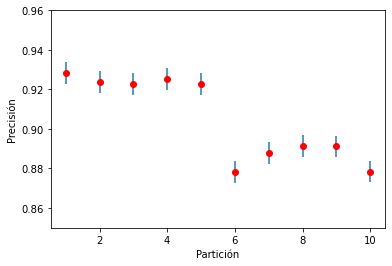

Precisión e intervalos de confianza para HMM con validación cruzada barajado


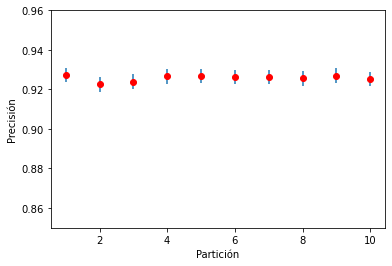

In [18]:
#Calculamos los intervalos de confianza y representamos los resultados HMM 
from math import sqrt 
import matplotlib.pyplot as plt
columnas = [1, 2, 3, 4, 5, 6 ,7 ,8 ,9 ,10]
intervaloHMM = [] 
for i in range(0,len(precisionesHMM)): 
    s = sqrt(precisionesHMM[i]*(1-precisionesHMM[i])/palabrasPorTest[i]) 
    r = 1.96*s 
    intervaloHMM.append(r) 
print("Precisión e intervalos de confianza para HMM con validación cruzada sin barajar")
plt.plot(columnas, precisionesHMM, 'ro')
plt.errorbar(columnas, precisionesHMM, yerr=r,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.ylim((0.85,0.96))
plt.show()
intervaloHMM = [] 
for i in range(0,len(precisionesHMMBarajado)):  
    s = sqrt(precisionesHMMBarajado[i]*(1-precisionesHMMBarajado[i])/palabrasPorTestBarajado[i]) 
    r = 1.96*s 
    intervaloHMM.append(r) 
print("Precisión e intervalos de confianza para HMM con validación cruzada barajado")
plt.plot(columnas, precisionesHMMBarajado, 'ro')
plt.errorbar(columnas, precisionesHMMBarajado, yerr=r,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.ylim((0.85,0.96))
plt.show()

Intervalos de confianza para TNT sin barajar


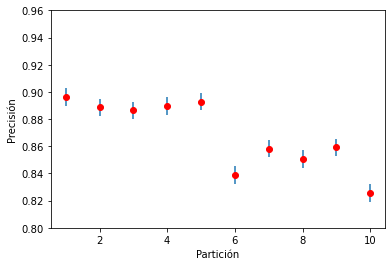

Intervalos de confianza para TNT barajado


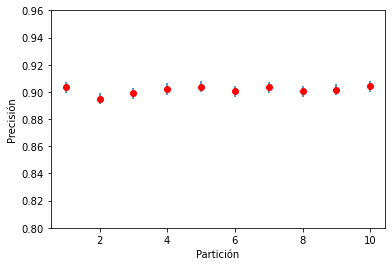

In [19]:
intervaloTNT = [] 
for i in range(0,len(precisionesTNT)): 
    s = sqrt(precisionesTNT[i]*(1-precisionesTNT[i])/palabrasPorTest[i]) 
    r = 1.96*s 
    intervaloHMM.append(r) 
print("Intervalos de confianza para TNT sin barajar")
plt.plot(columnas, precisionesTNT, 'ro')
plt.errorbar(columnas, precisionesTNT, yerr=r,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.ylim((0.80,0.96))
plt.show()
intervaloTNT = [] 
for i in range(0,len(precisionesTNTBarajado)): 
    s = sqrt(precisionesTNTBarajado[i]*(1-precisionesTNTBarajado[i])/palabrasPorTestBarajado[i]) 
    r = 1.96*s 
    intervaloHMM.append(r) 
print("Intervalos de confianza para TNT barajado")
plt.plot(columnas, precisionesTNTBarajado, 'ro')
plt.errorbar(columnas, precisionesTNTBarajado, yerr=r,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.ylim((0.80,0.96))
plt.show()

Como se puede observar en las gráficas, tanto en el caso de HMM como en el de TNT, los resultados mejoran al realizar un barajado de los datos previo al entrenamiento con Cross Validation.